<a href="https://colab.research.google.com/github/Dryame/alph-_bet-/blob/main/Projet13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Configuration pour de beaux graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [ ]:
# Données des emprunteurs
emprunteurs_data = {
    'P1': {'métier': 'Agriculteur', 'prêt': 500, 'solvabilité': 'Bonne'},
    'P2': {'métier': 'Commerçant', 'prêt': 800, 'solvabilité': 'Très bonne'},
    'P3': {'métier': 'Artisan', 'prêt': 300, 'solvabilité': 'Moyenne'},
    'P4': {'métier': 'Enseignant', 'prêt': 400, 'solvabilité': 'Bonne'},
    'P5': {'métier': 'Éleveur', 'prêt': 600, 'solvabilité': 'Moyenne'},
    'P6': {'métier': 'Infirmier', 'prêt': 350, 'solvabilité': 'Bonne'},
    'P7': {'métier': 'Menuisier', 'prêt': 250, 'solvabilité': 'Faible'},
    'P8': {'métier': 'Couturier', 'prêt': 450, 'solvabilité': 'Moyenne'}
}

# Relations de garantie
relations_garantie = [
    ('P1', 'P2'),  # P1 garanti par P2 et P3
    ('P1', 'P3'),
    ('P2', 'P4'),  # P2 garanti par P1 et P4
    ('P3', 'P5'),  # P3 garanti par P1 et P5
    ('P4', 'P6'),  # P4 garanti par P2 et P6
    ('P5', 'P7'),  # P5 garanti par P3 et P7
    ('P6', 'P8'),  # P6 garanti par P4 et P8
    ('P7', 'P8'),  # P7 garanti par P5 et P8, P8 garanti par P6 et P7
]

# Convertir en DataFrame pour visualisation
df_emprunteurs = pd.DataFrame(emprunteurs_data).T
df_emprunteurs['Montant (kFCFA)'] = df_emprunteurs['prêt']

print("DONNÉES DES EMPRUNTEURS")

print(df_emprunteurs)
print(f"\nMontant total des prêts : {df_emprunteurs['prêt'].sum()} kFCFA")


DONNÉES DES EMPRUNTEURS
         métier prêt solvabilité Montant (kFCFA)
P1  Agriculteur  500       Bonne             500
P2   Commerçant  800  Très bonne             800
P3      Artisan  300     Moyenne             300
P4   Enseignant  400       Bonne             400
P5      Éleveur  600     Moyenne             600
P6    Infirmier  350       Bonne             350
P7    Menuisier  250      Faible             250
P8    Couturier  450     Moyenne             450

Montant total des prêts : 3650 kFCFA


In [ ]:
def construire_graphe_value():

    # Initialiser le graphe
    G = nx.Graph()

    # Ajouter les sommets avec leurs attributs
    for personne, attributs in emprunteurs_data.items():
        G.add_node(personne,
                   métier=attributs['métier'],
                   prêt=attributs['prêt'],
                   solvabilité=attributs['solvabilité'])

    # Ajouter les arêtes avec pondération
    for p1, p2 in relations_garantie:
        # Calculer le poids : exposition moyenne
        montant_p1 = emprunteurs_data[p1]['prêt']
        montant_p2 = emprunteurs_data[p2]['prêt']
        poids = (montant_p1 + montant_p2) / 2

        # Ajouter l'arête avec poids et attributs supplémentaires
        G.add_edge(p1, p2,
                   weight=poids,
                   montant_p1=montant_p1,
                   montant_p2=montant_p2,
                   exposition_max=max(montant_p1, montant_p2))

    return G

# Construire le graphe
G = construire_graphe_value()

print("\n" + "=" * 70)
print("CARACTÉRISTIQUES DU GRAPHE")
print("=" * 70)
print(f"Nombre de sommets (emprunteurs) : {G.number_of_nodes()}")
print(f"Nombre d'arêtes (relations de garantie) : {G.number_of_edges()}")
print(f"Densité du graphe : {nx.density(G):.3f}")
print(f"Graphe connexe : {nx.is_connected(G)}")
print("=" * 70)


CARACTÉRISTIQUES DU GRAPHE
Nombre de sommets (emprunteurs) : 8
Nombre d'arêtes (relations de garantie) : 8
Densité du graphe : 0.286
Graphe connexe : True


In [ ]:
def afficher_tableau_relations(G):
    """
    Affiche un tableau détaillé des relations de garantie
    """
    relations_data = []

    for u, v, data in G.edges(data=True):
        relations_data.append({
            'Relation': f"{u} ↔ {v}",
            'Prêt P1 (kFCFA)': data['montant_p1'],
            'Prêt P2 (kFCFA)': data['montant_p2'],
            'Poids (Moyenne)': data['weight'],
            'Exposition Max': data['exposition_max'],
            'Métier P1': G.nodes[u]['métier'],
            'Métier P2': G.nodes[v]['métier']
        })

    df_relations = pd.DataFrame(relations_data)
    df_relations = df_relations.sort_values('Poids (Moyenne)', ascending=False)

    print("\n" + "=" * 100)
    print("TABLEAU DES RELATIONS DE GARANTIE VALUÉES")
    print("=" * 100)
    print(df_relations.to_string(index=False))
    print("=" * 100)
    print(f"\nExposition totale du réseau : {df_relations['Poids (Moyenne)'].sum():.0f} kFCFA")
    print(f"Exposition moyenne par relation : {df_relations['Poids (Moyenne)'].mean():.0f} kFCFA")
    print(f"Relation à plus haut risque : {df_relations.iloc[0]['Relation']} ({df_relations.iloc[0]['Poids (Moyenne)']} kFCFA)")
    print("=" * 100)

    return df_relations

df_relations = afficher_tableau_relations(G)


TABLEAU DES RELATIONS DE GARANTIE VALUÉES
Relation  Prêt P1 (kFCFA)  Prêt P2 (kFCFA)  Poids (Moyenne)  Exposition Max   Métier P1  Métier P2
 P1 ↔ P2              500              800            650.0             800 Agriculteur Commerçant
 P2 ↔ P4              800              400            600.0             800  Commerçant Enseignant
 P3 ↔ P5              300              600            450.0             600     Artisan    Éleveur
 P5 ↔ P7              600              250            425.0             600     Éleveur  Menuisier
 P1 ↔ P3              500              300            400.0             500 Agriculteur    Artisan
 P6 ↔ P8              350              450            400.0             450   Infirmier  Couturier
 P4 ↔ P6              400              350            375.0             400  Enseignant  Infirmier
 P7 ↔ P8              250              450            350.0             450   Menuisier  Couturier

Exposition totale du réseau : 3650 kFCFA
Exposition moyenne par r

In [ ]:
def afficher_matrice_adjacence(G):
    """
    Affiche la matrice d'adjacence pondérée
    """
    # Récupérer les noms des nœuds triés
    nodes = sorted(G.nodes())

    # Créer la matrice d'adjacence pondérée
    adjacence = nx.to_pandas_adjacency(G, nodelist=nodes, weight='weight')

    print("\n" + "=" * 90)
    print("MATRICE D'ADJACENCE PONDÉRÉE (kFCFA)")
    print("=" * 90)
    print(adjacence.to_string())
    print("=" * 90)

    return adjacence

matrice_adj = afficher_matrice_adjacence(G)


MATRICE D'ADJACENCE PONDÉRÉE (kFCFA)
       P1     P2     P3     P4     P5     P6     P7     P8
P1    0.0  650.0  400.0    0.0    0.0    0.0    0.0    0.0
P2  650.0    0.0    0.0  600.0    0.0    0.0    0.0    0.0
P3  400.0    0.0    0.0    0.0  450.0    0.0    0.0    0.0
P4    0.0  600.0    0.0    0.0    0.0  375.0    0.0    0.0
P5    0.0    0.0  450.0    0.0    0.0    0.0  425.0    0.0
P6    0.0    0.0    0.0  375.0    0.0    0.0    0.0  400.0
P7    0.0    0.0    0.0    0.0  425.0    0.0    0.0  350.0
P8    0.0    0.0    0.0    0.0    0.0  400.0  350.0    0.0


In [ ]:
def analyser_degres_ponderes(G):
    """
    Analyse les degrés (simples et pondérés) de chaque sommet
    """
    analyse_data = []

    for node in G.nodes():
        # Degré simple (nombre de connexions)
        degre_simple = G.degree(node)

        # Degré pondéré (exposition totale)
        degre_pondere = sum(G[node][voisin]['weight'] for voisin in G.neighbors(node))

        # Exposition maximale
        expositions = [G[node][voisin]['exposition_max'] for voisin in G.neighbors(node)]
        expo_max = max(expositions) if expositions else 0

        analyse_data.append({
            'Emprunteur': node,
            'Métier': G.nodes[node]['métier'],
            'Prêt (kFCFA)': G.nodes[node]['prêt'],
            'Solvabilité': G.nodes[node]['solvabilité'],
            'Nb Garants': degre_simple,
            'Exposition Totale (kFCFA)': degre_pondere,
            'Exposition Max (kFCFA)': expo_max
        })

    df_analyse = pd.DataFrame(analyse_data)
    df_analyse = df_analyse.sort_values('Exposition Totale (kFCFA)', ascending=False)

    print("\n" + "=" * 110)
    print("ANALYSE DES DEGRÉS ET EXPOSITIONS")
    print("=" * 110)
    print(df_analyse.to_string(index=False))
    print("=" * 110)

    # Statistiques
    print(f"\nExposition moyenne par emprunteur : {df_analyse['Exposition Totale (kFCFA)'].mean():.0f} kFCFA")
    print(f"Emprunteur le plus exposé : {df_analyse.iloc[0]['Emprunteur']} ({df_analyse.iloc[0]['Exposition Totale (kFCFA)']} kFCFA)")
    print(f"Emprunteur le moins exposé : {df_analyse.iloc[-1]['Emprunteur']} ({df_analyse.iloc[-1]['Exposition Totale (kFCFA)']} kFCFA)")
    print("=" * 110)

    return df_analyse

df_analyse = analyser_degres_ponderes(G)


ANALYSE DES DEGRÉS ET EXPOSITIONS
Emprunteur      Métier  Prêt (kFCFA) Solvabilité  Nb Garants  Exposition Totale (kFCFA)  Exposition Max (kFCFA)
        P2  Commerçant           800  Très bonne           2                     1250.0                     800
        P1 Agriculteur           500       Bonne           2                     1050.0                     800
        P4  Enseignant           400       Bonne           2                      975.0                     800
        P5     Éleveur           600     Moyenne           2                      875.0                     600
        P3     Artisan           300     Moyenne           2                      850.0                     600
        P6   Infirmier           350       Bonne           2                      775.0                     450
        P7   Menuisier           250      Faible           2                      775.0                     600
        P8   Couturier           450     Moyenne           2         

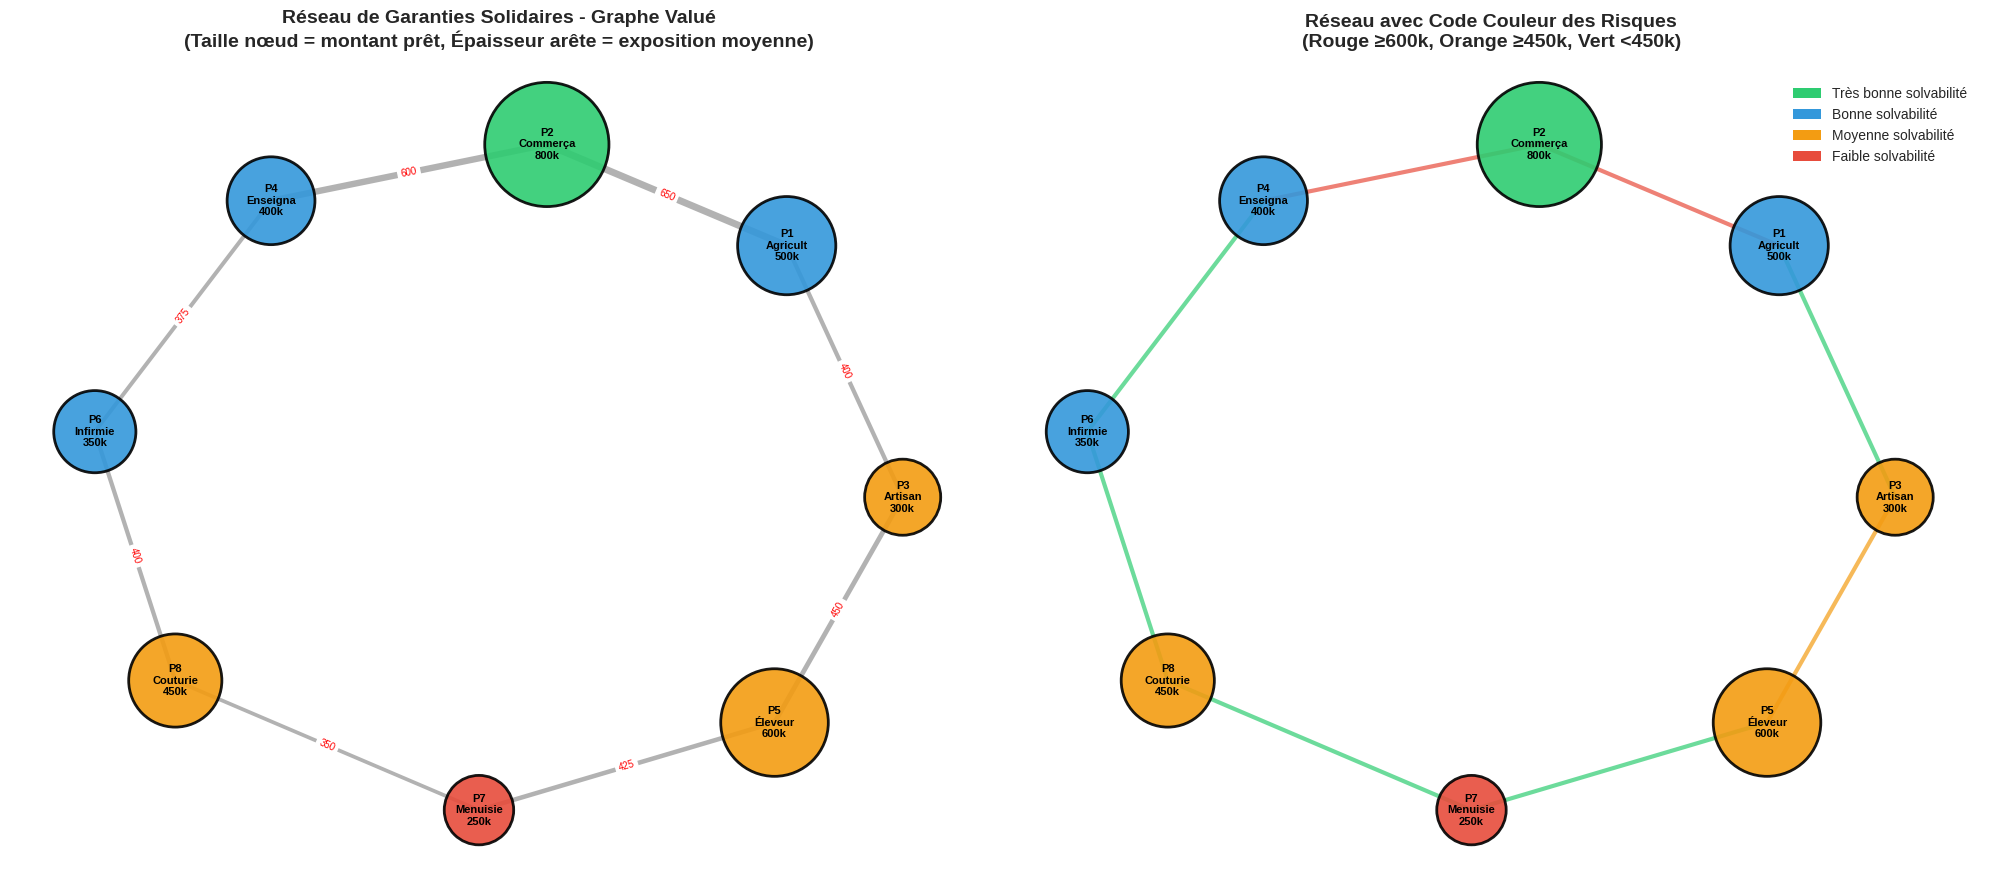


✅ Graphique sauvegardé : graphe_reseau_garanties.png


In [11]:
def visualiser_graphe_value(G, df_analyse):
    """
    Visualise le graphe avec pondérations et attributs
    """
    fig, axes = plt.subplots(1, 2, figsize=(20, 9))

    # Mapping des couleurs selon la solvabilité
    couleurs_solvabilite = {
        'Très bonne': '#2ecc71',  # Vert
        'Bonne': '#3498db',        # Bleu
        'Moyenne': '#f39c12',      # Orange
        'Faible': '#e74c3c'        # Rouge
    }

    # Tailles des nœuds proportionnelles au montant du prêt
    node_sizes = [G.nodes[node]['prêt'] * 10 for node in G.nodes()]

    # Couleurs des nœuds selon la solvabilité
    node_colors = [couleurs_solvabilite[G.nodes[node]['solvabilité']] for node in G.nodes()]

    # Layout pour les deux visualisations
    pos = nx.spring_layout(G, k=2, iterations=50, seed=42)

    # --- GRAPHIQUE 1 : Graphe avec épaisseur des arêtes proportionnelle au poids ---
    ax1 = axes[0]

    # Dessiner les arêtes avec épaisseur variable
    edges = G.edges()
    weights = [G[u][v]['weight'] for u, v in edges]
    max_weight = max(weights)
    edge_widths = [5 * w / max_weight for w in weights]

    nx.draw_networkx_edges(G, pos, ax=ax1, width=edge_widths,
                          alpha=0.6, edge_color='gray')

    # Dessiner les nœuds
    nx.draw_networkx_nodes(G, pos, ax=ax1, node_size=node_sizes,
                          node_color=node_colors, alpha=0.9,
                          edgecolors='black', linewidths=2)

    # Labels des nœuds
    labels = {node: f"{node}\n{G.nodes[node]['métier'][:8]}\n{G.nodes[node]['prêt']}k"
              for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels, ax=ax1, font_size=8,
                           font_weight='bold')

    # Labels des arêtes (poids)
    edge_labels = {(u, v): f"{G[u][v]['weight']:.0f}" for u, v in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels, ax=ax1,
                                font_size=7, font_color='red')

    ax1.set_title("Réseau de Garanties Solidaires - Graphe Valué\n" +
                 "(Taille nœud = montant prêt, Épaisseur arête = exposition moyenne)",
                 fontsize=14, fontweight='bold', pad=20)
    ax1.axis('off')

    # --- GRAPHIQUE 2 : Graphe avec code couleur des arêtes ---
    ax2 = axes[1]

    # Couleur des arêtes selon le niveau de risque
    edge_colors = []
    for u, v in edges:
        poids = G[u][v]['weight']
        if poids >= 600:
            edge_colors.append('#e74c3c')  # Rouge - Haut risque
        elif poids >= 450:
            edge_colors.append('#f39c12')  # Orange - Risque moyen
        else:
            edge_colors.append('#2ecc71')  # Vert - Faible risque

    nx.draw_networkx_edges(G, pos, ax=ax2, width=3,
                          edge_color=edge_colors, alpha=0.7)

    nx.draw_networkx_nodes(G, pos, ax=ax2, node_size=node_sizes,
                          node_color=node_colors, alpha=0.9,
                          edgecolors='black', linewidths=2)

    nx.draw_networkx_labels(G, pos, labels, ax=ax2, font_size=8,
                           font_weight='bold')

    ax2.set_title("Réseau avec Code Couleur des Risques\n" +
                 "(Rouge ≥600k, Orange ≥450k, Vert <450k)",
                 fontsize=14, fontweight='bold', pad=20)
    ax2.axis('off')

    # Légende pour la solvabilité
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#2ecc71', label='Très bonne solvabilité'),
        Patch(facecolor='#3498db', label='Bonne solvabilité'),
        Patch(facecolor='#f39c12', label='Moyenne solvabilité'),
        Patch(facecolor='#e74c3c', label='Faible solvabilité')
    ]
    ax2.legend(handles=legend_elements, loc='upper right', fontsize=10)

    plt.tight_layout()
    plt.savefig('graphe_reseau_garanties.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\n✅ Graphique sauvegardé : graphe_reseau_garanties.png")

visualiser_graphe_value(G, df_analyse)

In [12]:
def statistiques_recapitulatives(G, df_analyse, df_relations):
    """
    Affiche un résumé statistique complet
    """
    print("\n" + "=" * 90)
    print("📊 STATISTIQUES RÉCAPITULATIVES DU RÉSEAU")
    print("=" * 90)

    print("\n🔷 CARACTÉRISTIQUES DU GRAPHE")
    print(f"   • Nombre d'emprunteurs : {G.number_of_nodes()}")
    print(f"   • Nombre de relations : {G.number_of_edges()}")
    print(f"   • Densité : {nx.density(G):.3f}")
    print(f"   • Diamètre : {nx.diameter(G) if nx.is_connected(G) else 'Non connexe'}")
    print(f"   • Degré moyen : {sum(dict(G.degree()).values()) / G.number_of_nodes():.2f}")

    print("\n💰 MONTANTS ET EXPOSITIONS")
    print(f"   • Montant total des prêts : {df_analyse['Prêt (kFCFA)'].sum():,} kFCFA")
    print(f"   • Montant moyen par prêt : {df_analyse['Prêt (kFCFA)'].mean():.0f} kFCFA")
    print(f"   • Exposition totale du réseau : {df_relations['Poids (Moyenne)'].sum():,.0f} kFCFA")
    print(f"   • Exposition moyenne par relation : {df_relations['Poids (Moyenne)'].mean():.0f} kFCFA")

    print("\n⚠️  PROFIL DE RISQUE")
    solvabilites = df_analyse['Solvabilité'].value_counts()
    for solv, count in solvabilites.items():
        print(f"   • {solv} : {count} emprunteur(s)")

    print("\n🎯 EMPRUNTEURS CLÉS")
    print(f"   • Plus forte exposition : {df_analyse.iloc[0]['Emprunteur']} "
          f"({df_analyse.iloc[0]['Exposition Totale (kFCFA)']} kFCFA)")
    print(f"   • Plus gros prêt : {df_analyse.nlargest(1, 'Prêt (kFCFA)').iloc[0]['Emprunteur']} "
          f"({df_analyse['Prêt (kFCFA)'].max()} kFCFA)")
    print(f"   • Relation à plus haut risque : {df_relations.iloc[0]['Relation']} "
          f"({df_relations.iloc[0]['Poids (Moyenne)']} kFCFA)")

    print("\n⚡ POINTS D'ATTENTION")
    # Identifier P7 (faible solvabilité)
    p7_data = df_analyse[df_analyse['Emprunteur'] == 'P7'].iloc[0]
    print(f"   • P7 (Menuisier) : Solvabilité FAIBLE")
    print(f"     - Prêt : {p7_data['Prêt (kFCFA)']} kFCFA")
    print(f"     - Garants : P5 et P8")
    print(f"     - Exposition totale : {p7_data['Exposition Totale (kFCFA)']} kFCFA")

    print("=" * 90)

statistiques_recapitulatives(G, df_analyse, df_relations)


📊 STATISTIQUES RÉCAPITULATIVES DU RÉSEAU

🔷 CARACTÉRISTIQUES DU GRAPHE
   • Nombre d'emprunteurs : 8
   • Nombre de relations : 8
   • Densité : 0.286
   • Diamètre : 4
   • Degré moyen : 2.00

💰 MONTANTS ET EXPOSITIONS
   • Montant total des prêts : 3,650 kFCFA
   • Montant moyen par prêt : 456 kFCFA
   • Exposition totale du réseau : 3,650 kFCFA
   • Exposition moyenne par relation : 456 kFCFA

⚠️  PROFIL DE RISQUE
   • Bonne : 3 emprunteur(s)
   • Moyenne : 3 emprunteur(s)
   • Très bonne : 1 emprunteur(s)
   • Faible : 1 emprunteur(s)

🎯 EMPRUNTEURS CLÉS
   • Plus forte exposition : P2 (1250.0 kFCFA)
   • Plus gros prêt : P2 (800 kFCFA)
   • Relation à plus haut risque : P1 ↔ P2 (650.0 kFCFA)

⚡ POINTS D'ATTENTION
   • P7 (Menuisier) : Solvabilité FAIBLE
     - Prêt : 250 kFCFA
     - Garants : P5 et P8
     - Exposition totale : 775.0 kFCFA


In [13]:
from google.colab import userdata
userdata.get('secretName')

SecretNotFoundError: Secret secretName does not exist.

In [14]:
import kagglehub
path = kagglehub.model_download('google/gemini-2.5-pro-api/api/gemini-2.5-pro/1')